importing libraries

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn as sns

importing dataset

In [135]:
df = pd.read_csv("train.csv")
df.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35
3,4,12597,23,112,19,Male,Student,220,613,3.77
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13


finding no of rows and columns

In [136]:
pd.DataFrame({"Rows":df.shape[0],"Columns":df.shape[1]},index = [1])

,Rows,Columns
1,89197,10


In [137]:
# pd.DataFrame({"Column Name":df.columns})

checking if there are any missing values

In [138]:
missing = df.isnull().sum()
missing = missing[missing>0]# Taking values where there are missing values
miss_per = round(missing/len(df),3)*100
pd.DataFrame({"Missing Entries":missing,"Missing Percentage":miss_per}).sort_values("Missing Percentage",ascending = False)

,Missing Entries,Missing Percentage


doing discriptive analysis

In [139]:
df.describe()

,row_id,user_id,category_id,video_id,age,followers,views,engagement_score
count,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000
mean,44599.000000,13881.909806,18.323733,77.715383,24.848616,252.460172,502.980268,3.487797
std,25749.100318,8005.582771,11.675154,48.469656,8.955535,46.094468,268.569482,0.863498
min,1.000000,1.000000,1.000000,1.000000,10.000000,160.000000,30.000000,0.000000
25%,22300.000000,6945.000000,8.000000,34.000000,18.000000,230.000000,229.000000,2.900000
50%,44599.000000,13892.000000,16.000000,76.000000,23.000000,240.000000,467.000000,3.710000
75%,66898.000000,20819.000000,26.000000,120.000000,32.000000,280.000000,714.000000,4.150000
max,89197.000000,27734.000000,47.000000,175.000000,68.000000,360.000000,1000.000000,5.000000


In [140]:
df['gender'].value_counts(dropna = False)

Male      52397
Female    36800
Name: gender, dtype: int64

In [141]:
# sns.pairplot(data=df, diag_kind='kde')

droping row_id column

In [142]:
df=df.drop('row_id',axis=1)

doing label encoding for profession and one hot encoding for gender

In [143]:
from sklearn.preprocessing import LabelEncoder
df = pd.get_dummies(data=df,columns=['gender'])
labelencoder = LabelEncoder()
df['profession'] = labelencoder.fit_transform(df['profession'])

df

,user_id,category_id,video_id,age,profession,followers,views,engagement_score,gender_Female,gender_Male
0,19990,37,128,24,1,180,1000,4.33,0,1
1,5304,32,132,14,1,330,714,1.79,1,0
2,1840,12,24,19,1,180,138,4.35,0,1
3,12597,23,112,19,1,220,613,3.77,0,1
4,13626,23,112,27,2,220,613,3.13,0,1
...,...,...,...,...,...,...,...,...,...,...
89192,23996,15,32,25,0,340,662,3.91,0,1
89193,20466,20,47,31,0,240,892,3.56,0,1
89194,13655,16,97,25,1,270,462,4.23,0,1
89195,24840,9,18,35,2,230,819,3.77,0,1


In [144]:
df.columns

Index(['user_id', 'category_id', 'video_id', 'age', 'profession', 'followers',
       'views', 'engagement_score', 'gender_Female', 'gender_Male'],
      dtype='object')

In [145]:
df= df[['user_id', 'category_id', 'video_id', 'age', 'profession', 'followers',
       'views',  'gender_Female', 'gender_Male','engagement_score']]
df= df.drop(['gender_Male','video_id'],axis=1)

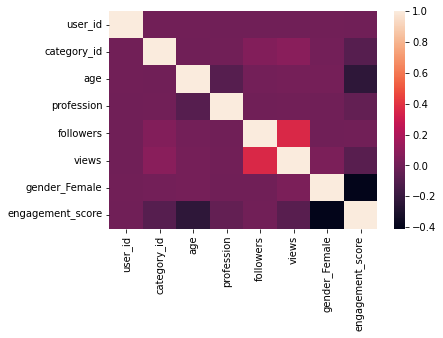

In [146]:
ax=sns.heatmap(df.corr())
plt.show()

In [147]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values


In [149]:
from sklearn.preprocessing import StandardScaler
norm = StandardScaler().fit(x)

# transform training data
x = norm.transform(x)

In [150]:
from sklearn.preprocessing import QuantileTransformer

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# from xgboost import XGBRegressor
model = RandomForestRegressor()
from sklearn.compose import TransformedTargetRegressor
ttr = TransformedTargetRegressor(regressor=model, transformer=QuantileTransformer(output_distribution='normal'))
ttr.fit(x, y)
# qt.fit_transform(x)

model.fit(x, y)

In [ ]:
test = pd.read_csv("test.csv")
test= test.drop('row_id',axis=1)
test = pd.get_dummies(data=test,columns=['gender'])

test['profession'] = labelencoder.transform(test['profession'])
test=test.drop(['gender_Male','video_id'],axis=1)

test=test.values
test= norm.transform(test)


In [ ]:
y_pred=model.predict(test)
y_pred

In [ ]:
row_id = []
for i in range(89198,100319):
    row_id.append(i)


In [ ]:
data = pd.DataFrame(row_id,columns=['row_id'])

In [ ]:
data['engagement_score'] = y_pred

In [ ]:
data

In [ ]:
data.to_csv("test_result.csv")